In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd 
import os 
from pathlib  import Path



注意： __file__变量在Python脚本中通常用于获取当前脚本文件的路径。\
但是，在Jupyter Notebook中，由于代码是在一个交互式环境中执行的，没有与脚本文件相关联，因此__file__变量未定义。\ 
```python
path = Path(os.path.dirname(__file__))
red_wine = pd.read_csv( str(path / Path ( "data/winequality-red.csv" )))

In [7]:
red_wine = pd.read_csv(  "./data/winequality-red.csv" )
print(red_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [8]:
## 构 建 模 型
model = keras.Sequential([
    layers.Dense(units = 1,input_shape =(len(red_wine.columns)-1,))    
])


In [17]:
## 打印这个 model 有的属性和方法
print(dir(model))

['_SCALAR_UPRANKING_ON', '_TF_MODULE_IGNORED_PROPERTIES', '__call__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_activity_regularizer', '_add_trackable', '_add_trackable_child', '_add_variable_with_custom_getter', '_aggregate_exact_metrics', '_assert_compile_was_called', '_assert_weights_created', '_auto_get_config', '_auto_track_sub_layers', '_autocast', '_autographed_call', '_base_model_initialized', '_build_graph_network_for_inferred_shape', '_build_input_shape', '_call_spec', '_callable_losses', '_captured_weight_regularizer', '_cast_single_input', '_check_call_args', '_check_sample_weight_warning', '_checkpoint', '_checkpoin

In [13]:
# 打印 模型的 权重 和 偏移
print(model.weights)
len(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.27692974],
       [ 0.06060094],
       [ 0.64091057],
       [ 0.30850667],
       [ 0.56479996],
       [ 0.34733206],
       [ 0.45466548],
       [-0.08950442],
       [ 0.05110776],
       [-0.6133975 ],
       [ 0.32231313]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


2

+ 格式化输出 w 和 b
+ 使用format()方法来格式化字符串 , 其中 {} 是占位符的意思，也可以如下输出：
```python
print("weight is {weight} , and the bias is {bias} ".format(weight=w, bias=b))

In [19]:

w,b = model.weights
print("weight is \n{}\n , and the bais is \n{}\n " .format(b,w))

weight is 
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>
 , and the bais is 
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.27692974],
       [ 0.06060094],
       [ 0.64091057],
       [ 0.30850667],
       [ 0.56479996],
       [ 0.34733206],
       [ 0.45466548],
       [-0.08950442],
       [ 0.05110776],
       [-0.6133975 ],
       [ 0.32231313]], dtype=float32)>
 


+ Optional: Plot the output of an untrained linear model   
+ 可选项: 绘制未经训练的线性模型的输出，以下代码是展示在没有训练的情况下的图像

In [22]:
import tensorflow as tf
x =  tf.linspace([0.0 , 5.0] , [10.0 , 40.0] , 5 , axis=0 ) ## 默认
x

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 0.  ,  5.  ],
       [ 2.5 , 13.75],
       [ 5.  , 22.5 ],
       [ 7.5 , 31.25],
       [10.  , 40.  ]], dtype=float32)>

4/4 [==============================] - 0s 2ms/step


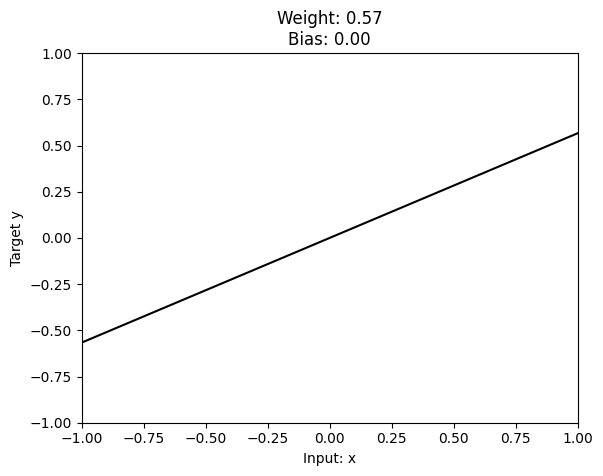

In [27]:
import matplotlib.pyplot as plt

model_ = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model_.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model_.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()